In [1]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sentianalyst import analisar_sentimento, classificar
from sentianalyst.lexicons import get_full_lexicon

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
def avaliar_modelo(caminho_csv, coluna_texto="comentario", coluna_rotulo="sentimento"):
    # Carrega o dataset
    df = pd.read_csv(caminho_csv, dtype=str)

    # Remove comentários nulos ou vazios
    df = df.dropna(subset=[coluna_texto, coluna_rotulo])
    df = df[df[coluna_texto].str.strip() != ""]

    # Mapeia rótulos reais
    df["label_real"] = df[coluna_rotulo].map({"Yes": "positivo", "No": "negativo"})

    # Garante que só tenhamos rótulos válidos
    df = df[df["label_real"].isin(["positivo", "negativo"])]

    # Aplica o modelo simbólico
    lexicon = get_full_lexicon()
    df["score"] = df[coluna_texto].apply(lambda x: analisar_sentimento(str(x), lexicon))

    # Apenas valores válidos (float) serão classificados
    df["label_pred"] = df["score"].apply(
        lambda s: classificar(s) if isinstance(s, (int, float)) else "neutro"
    )

    print("\n Frequência de rótulos reais e preditos:")
    print(df["label_real"].value_counts())
    print(df["label_pred"].value_counts())

    # Avaliação
    print("\n Métricas de avaliação:")
    print(classification_report(
        df["label_real"],
        df["label_pred"],
        labels=["positivo", "negativo"],
        digits=3,
        zero_division=0  # evita o warning
    ))

    print("\n Matriz de confusão:")
    cm = confusion_matrix(df["label_real"], df["label_pred"], labels=["positivo", "negativo"])

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Positivo", "Negativo"], yticklabels=["Positivo", "Negativo"])
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.title("Matriz de Confusão")
    plt.show()

    return df


 Frequência de rótulos reais e preditos:
label_real
positivo    95066
negativo    34014
Name: count, dtype: int64
label_pred
negativo    79855
positivo    49225
Name: count, dtype: int64

 Métricas de avaliação:
              precision    recall  f1-score   support

    positivo      0.954     0.494     0.651     95066
    negativo      0.398     0.933     0.558     34014

    accuracy                          0.610    129080
   macro avg      0.676     0.714     0.604    129080
weighted avg      0.807     0.610     0.626    129080


 Matriz de confusão:


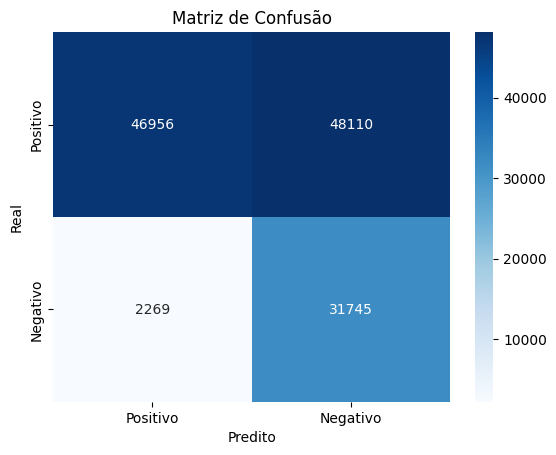

In [3]:
# Define the URL of the CSV file
url = "https://raw.githubusercontent.com/americanas-tech/b2w-reviews01/main/B2W-Reviews01.csv"

# Lendo o arquivo csv num pandas dataframe
try:
    avaliar_modelo(url, "review_text", "recommend_to_a_friend")
except Exception as e:
    print(f"An error occurred: {e}")